<a href="https://colab.research.google.com/github/MonishKoushal/Student_Performance_Prediction/blob/main/Student_Performance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
# Loading data
df=pd.read_csv("StudentsPerformance.csv")
print(df.head())
print(df.shape)
print(df.describe())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
(1000, 8)
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std  

In [61]:
# Checking Missing values
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [62]:
# Feature Target Split
X = df.drop("math score", axis=1)
y = df["math score"]

In [63]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include=["object", "category"]).columns
print(categorical_cols)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')


In [64]:
# Encoding

X_encoded=pd.get_dummies(X,drop_first=True)
print(X_encoded.shape)
X_encoded.head()

(1000, 14)


,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,90,88,False,False,True,False,False,False,False,False,True,False,True,False
2,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,57,44,True,False,False,False,False,False,False,False,False,False,False,True
4,78,75,True,False,True,False,False,False,False,False,True,False,True,True


In [65]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_encoded)

In [66]:
# Train-Test-Split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(
    X_scaled,y,test_size=0.2,random_state=42
    )

In [67]:
# Model Selection and Training
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [69]:
# Prediction
y_pred=model.predict(X_test)

In [71]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

print("MAE:",mean_absolute_error(y_test,y_pred))
print("R2 Score",r2_score(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

MAE: 4.214763142474852
R2 Score 0.8804332983749565
MSE: 29.095169866715487


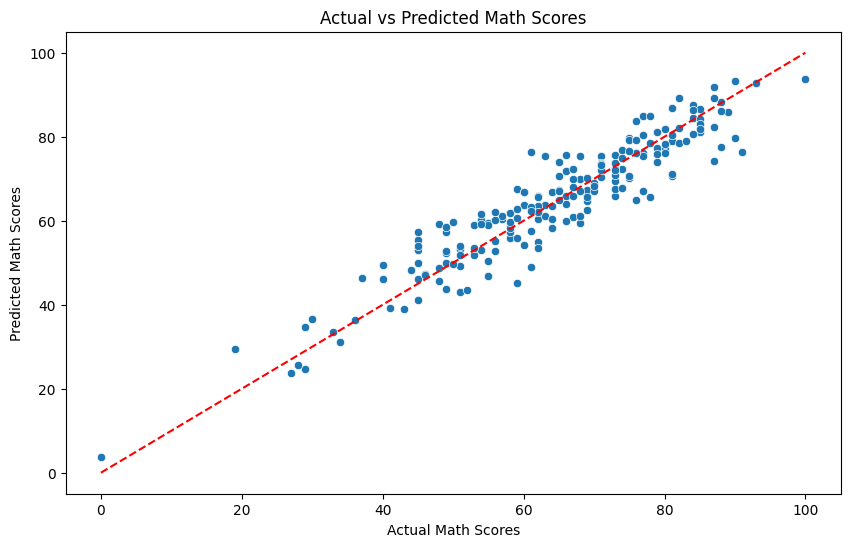

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("Actual vs Predicted Math Scores")
plt.plot([0, 100], [0, 100], 'r--')  # Perfect prediction line
plt.show()
